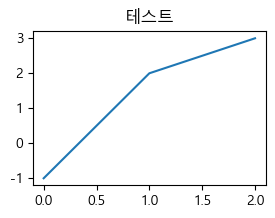

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 준비

#### 문제정의

> * 많이 발생하는 교통사고 유형은?
> * 사망자, 중상자수가 많은 교통사고 유형은?
> * 사망률, 중상률이 높은 교통사고 유형은??

#### 데이터 수집
https://www.data.go.kr/data/15070282/fileData.do

#### 데이터프레임 생성

In [13]:
# -----------------------------------------
# 데이터프레임 생성
# -----------------------------------------

data = pd.read_csv('C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\한국도로교통공단_사고유형별 교통사고 통계_20231231.csv')

#### 데이터 확인

In [14]:
# -----------------------------------------
# 데이터프레임 전체 확인
# -----------------------------------------

data

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,13081,419,5868,6999,664
1,차대사람,차도통행중,차도통행중,4507,135,1704,2491,355
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1985,28,544,1303,190
3,차대사람,보도통행중,보도통행중,2632,24,849,1735,206
4,차대사람,기타,기타,14791,253,4778,9111,1466
5,차대차,정면충돌,정면충돌,7899,162,3498,8781,612
6,차대차,측면충돌,측면충돌,65621,317,15386,77040,5983
7,차대차,후진중충돌,후진중충돌,4017,3,301,4724,254
8,차대차,추돌,추돌,31939,325,7197,46557,3300
9,차대차,기타,기타,43459,234,9735,48179,4740


In [15]:
# -----------------------------------------
# info()
# -----------------------------------------

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사고유형대분류  18 non-null     object
 1   사고유형중분류  18 non-null     object
 2   사고유형     18 non-null     object
 3   사고건수     18 non-null     int64 
 4   사망자수     18 non-null     int64 
 5   중상자수     18 non-null     int64 
 6   경상자수     18 non-null     int64 
 7   부상신고자수   18 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.3+ KB


In [16]:
# -----------------------------------------
# shape
# -----------------------------------------

data.shape

(18, 8)

#### 인덱스 설정


In [17]:
# -----------------------------------------
# 중첩인덱스 설정
#  - ['사고유형대분류', '사고유형']
# -----------------------------------------

data.set_index(['사고유형대분류', '사고유형'], inplace=True)

In [18]:
data

사고유형중분류   사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                                     
차대사람    횡단중                횡단중  13081   419   5868   6999     664
        차도통행중            차도통행중   4507   135   1704   2491     355
        길가장자리구역통행중  길가장자리구역통행중   1985    28    544   1303     190
        보도통행중            보도통행중   2632    24    849   1735     206
        기타                  기타  14791   253   4778   9111    1466
차대차     정면충돌              정면충돌   7899   162   3498   8781     612
        측면충돌              측면충돌  65621   317  15386  77040    5983
        후진중충돌            후진중충돌   4017     3    301   4724     254
        추돌                  추돌  31939   325   7197  46557    3300
        기타                  기타  43459   234   9735  48179    4740
차량단독    전도                  전도    895    83    329    395     185
        전복                  전복    130    18     48     71      20
        공작물충돌            공작물충돌   2809   307   1163   1619     587
        주/정차차량 충돌    주/정차차량 충돌     23     1     10      7       8
        도로이탈 추락           도로이탈    323    86    182    112      40
        도로이탈 기타           도로이탈    157    21     67     67      39
        기타                  기타   4026   134   1330   2377     592
철길건널목   철길건널목            철길건널목      2     1      0      1       0

In [19]:
# -----------------------------------------
# 인덱스 확인
# -----------------------------------------

data.index

MultiIndex([( '차대사람',        '횡단중'),
            ( '차대사람',      '차도통행중'),
            ( '차대사람', '길가장자리구역통행중'),
            ( '차대사람',      '보도통행중'),
            ( '차대사람',         '기타'),
            (  '차대차',       '정면충돌'),
            (  '차대차',       '측면충돌'),
            (  '차대차',      '후진중충돌'),
            (  '차대차',         '추돌'),
            (  '차대차',         '기타'),
            ( '차량단독',         '전도'),
            ( '차량단독',         '전복'),
            ( '차량단독',      '공작물충돌'),
            ( '차량단독',  '주/정차차량 충돌'),
            ( '차량단독',    '도로이탈 추락'),
            ( '차량단독',    '도로이탈 기타'),
            ( '차량단독',         '기타'),
            ('철길건널목',      '철길건널목')],
           names=['사고유형대분류', '사고유형'])

#### 컬럼 삭제

In [20]:
# -----------------------------------------
# 사고유형중분류 컬럼 삭제
# -----------------------------------------

data = data.drop(columns='사고유형중분류')
data

사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대사람    횡단중         13081   419   5868   6999     664
        차도통행중        4507   135   1704   2491     355
        길가장자리구역통행중   1985    28    544   1303     190
        보도통행중        2632    24    849   1735     206
        기타          14791   253   4778   9111    1466
차대차     정면충돌         7899   162   3498   8781     612
        측면충돌        65621   317  15386  77040    5983
        후진중충돌        4017     3    301   4724     254
        추돌          31939   325   7197  46557    3300
        기타          43459   234   9735  48179    4740
차량단독    전도            895    83    329    395     185
        전복            130    18     48     71      20
        공작물충돌        2809   307   1163   1619     587
        주/정차차량 충돌      23     1     10      7       8
        도로이탈 추락       323    86    182    112      40
        도로이탈 기타       157    21     67     67      39
        기타           4026   134   1330   2377     592
철길건널목   철길건널목           2     1      0      1       0

## 분석

#### 사고 유형별 사고건수

In [21]:
# -----------------------------------------
# 사고건수가 많은 순서로 정렬
# -----------------------------------------

data_sorted = data.sort_values(by='사고건수', ascending=False)
data_sorted

사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대차     측면충돌        65621   317  15386  77040    5983
        기타          43459   234   9735  48179    4740
        추돌          31939   325   7197  46557    3300
차대사람    기타          14791   253   4778   9111    1466
        횡단중         13081   419   5868   6999     664
차대차     정면충돌         7899   162   3498   8781     612
차대사람    차도통행중        4507   135   1704   2491     355
차량단독    기타           4026   134   1330   2377     592
차대차     후진중충돌        4017     3    301   4724     254
차량단독    공작물충돌        2809   307   1163   1619     587
차대사람    보도통행중        2632    24    849   1735     206
        길가장자리구역통행중   1985    28    544   1303     190
차량단독    전도            895    83    329    395     185
        도로이탈 추락       323    86    182    112      40
        도로이탈 기타       157    21     67     67      39
        전복            130    18     48     71      20
        주/정차차량 충돌      23     1     10      7       8
철길건널목   철길건널목           2     1      0      1       0

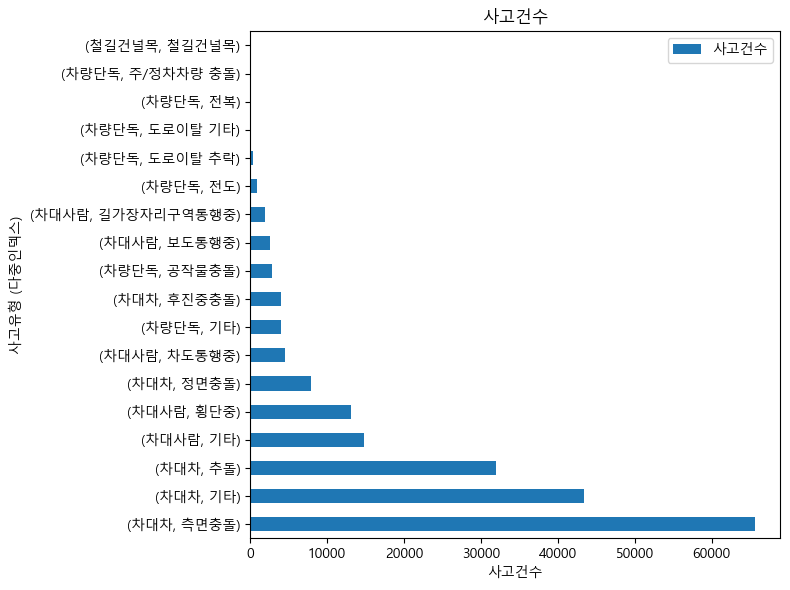

In [23]:
# -----------------------------------------
# 사고건수가 많은 순서로 정렬하여 시각화
# -----------------------------------------

data_sorted = data.sort_values(by='사고건수', ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
data_sorted['사고건수'].plot(kind='barh')
plt.title('사고건수')
plt.xlabel('사고건수')
plt.ylabel('사고유형 (다중인덱스)')
plt.legend(['사고건수'])
plt.tight_layout()
plt.show()

#### 사고 유형별 사망자수

In [24]:
# -----------------------------------------
# 사망자수가 많은 순서로 정렬
# -----------------------------------------

sorted_by_death = data.sort_values(by='사망자수', ascending=False)

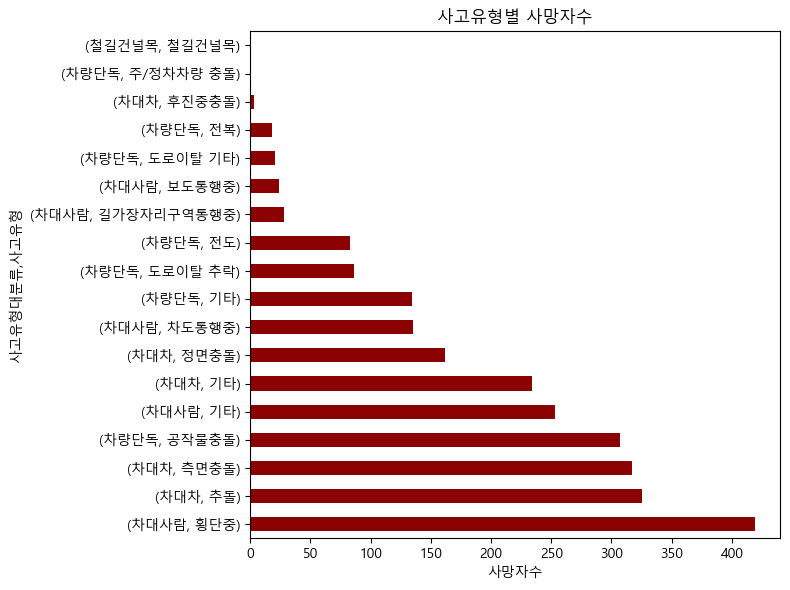

In [25]:
# -----------------------------------------
# 사망자수가 많은 순서로 정렬하여 시각화
# -----------------------------------------

plt.figure(figsize=(8, 6))
sorted_by_death['사망자수'].plot(kind='barh', color='darkred')
plt.title('사고유형별 사망자수')
plt.xlabel('사망자수')
plt.tight_layout()
plt.show()

#### 사고 유형별 중상자수

In [26]:
# -----------------------------------------
# 중상자수가 많은 순서로 정렬
# -----------------------------------------

sorted_by_severe = data.sort_values(by='중상자수', ascending=False)

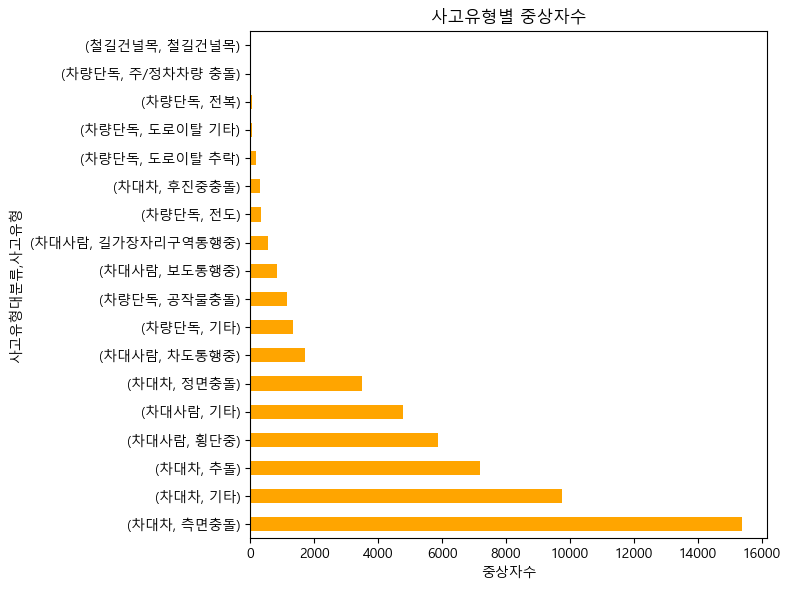

In [27]:
# -----------------------------------------
# 중상자수가 많은 순서로 정렬하여 시각화
# -----------------------------------------

plt.figure(figsize=(8, 6))
sorted_by_severe['중상자수'].plot(kind='barh', color='orange')
plt.title('사고유형별 중상자수')
plt.xlabel('중상자수')
plt.tight_layout()
plt.show()

#### 사고 유형별 사망률

In [28]:
# -----------------------------------------
# 파생컬럼 추거
# -----------------------------------------

data['사망률'] = data['사망자수'] / data['사고건수']

In [30]:
# -----------------------------------------
# 사망률 높은 순으로 정렬
# -----------------------------------------

death_rate_sorted = data.sort_values(by='사망률', ascending=False)
death_rate_sorted

사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률
사고유형대분류 사고유형                                                   
철길건널목   철길건널목           2     1      0      1       0  0.500000
차량단독    도로이탈 추락       323    86    182    112      40  0.266254
        전복            130    18     48     71      20  0.138462
        도로이탈 기타       157    21     67     67      39  0.133758
        공작물충돌        2809   307   1163   1619     587  0.109292
        전도            895    83    329    395     185  0.092737
        주/정차차량 충돌      23     1     10      7       8  0.043478
        기타           4026   134   1330   2377     592  0.033284
차대사람    횡단중         13081   419   5868   6999     664  0.032031
        차도통행중        4507   135   1704   2491     355  0.029953
차대차     정면충돌         7899   162   3498   8781     612  0.020509
차대사람    기타          14791   253   4778   9111    1466  0.017105
        길가장자리구역통행중   1985    28    544   1303     190  0.014106
차대차     추돌          31939   325   7197  46557    3300  0.010176
차대사람    보도통행중        2632    24    849   1735     206  0.009119
차대차     기타          43459   234   9735  48179    4740  0.005384
        측면충돌        65621   317  15386  77040    5983  0.004831
        후진중충돌        4017     3    301   4724     254  0.000747

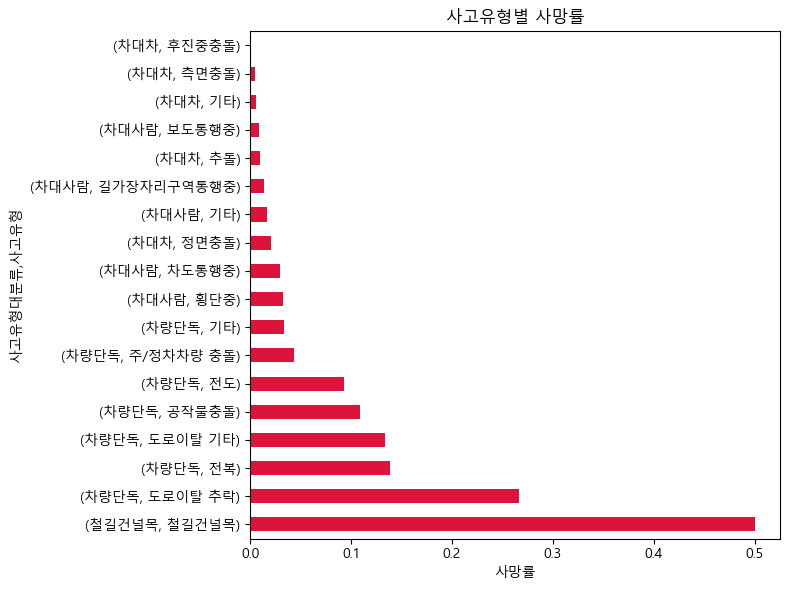

In [31]:
# -----------------------------------------
# 사망률 높은 순으로 정렬하여 시각화
# -----------------------------------------

plt.figure(figsize=(8, 6))
death_rate_sorted['사망률'].plot(kind='barh', color='crimson')
plt.title('사고유형별 사망률')
plt.xlabel('사망률')
plt.tight_layout()
plt.show()

#### 사고 유형별 중상률

In [ ]:
# -----------------------------------------
# 파생컬럼 추가
# -----------------------------------------

data['중상률'] = data['중상자수'] / data['사고건수']

In [34]:
# -----------------------------------------
# 중상률 높은 순으로 정렬하여 시각화
# -----------------------------------------

severe_rate_sorted = data.sort_values(by='중상률', ascending=False)

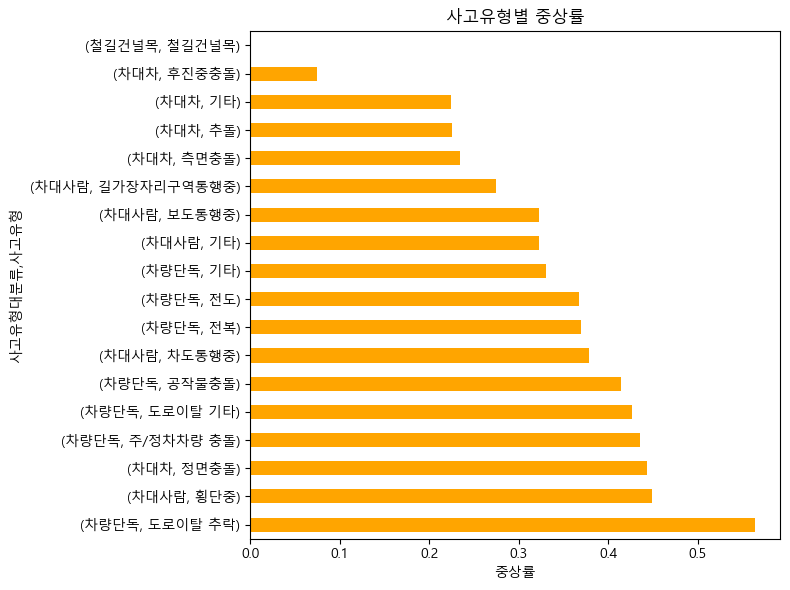

In [35]:
# -----------------------------------------
# 중상률 높은 순으로 정렬하여 시각화
# -----------------------------------------

plt.figure(figsize=(8, 6))
severe_rate_sorted['중상률'].plot(kind='barh', color='orange')
plt.title('사고유형별 중상률')
plt.xlabel('중상률')
plt.tight_layout()
plt.show()

## 결론 도출
* 산출물 업로드
    * 시각화 결과 캡처
    * 결론 도출

### 1. 사고 건수
- **가장 많이 발생한 사고유형**: `차대차, 측면충돌`
- 그 뒤를 이어 `차대차, 기타`, `차대차, 추돌` 순으로 사고 빈도가 높음  
→ **차량 간 사고 중 측면 및 추돌 유형이 가장 흔함**

### 2. 사망자수
- 사망자수가 가장 많은 사고유형도 `차대차, 측면충돌`
- `차대차, 기타`, `차대차, 추돌`이 뒤를 이음  
→ **사망자 수 또한 차량 간 충돌이 대부분을 차지**

### 3. 사망률
- `차대차, 횡단중`, `보도통행중` 등 **보행자와 관련된 사고유형의 사망률이 특히 높음**  
→ **보행자 사고는 빈도는 낮지만 치명률이 높아 위험도가 큼**

### 4. 중상률
- `차대차, 정면충돌`, `보행자 사고`, `차도통행중` 등에서 중상률이 높음  
→ **정면충돌 및 보행자 관련 사고는 중상 가능성이 큼**



# 추가 시각화

In [50]:
df = pd.read_csv('C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\인구동태건수_및_동태율_추이_출생_사망_혼인_이혼__20250415160244.csv')

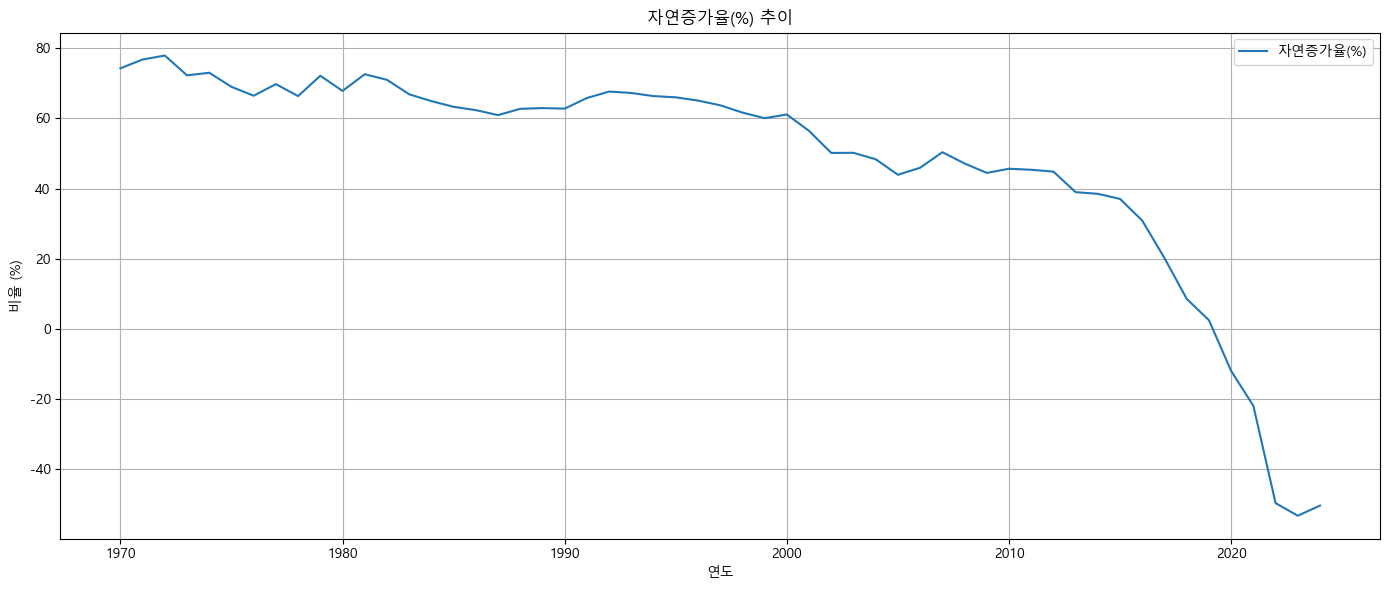

In [ ]:
df_t = df.set_index('기본항목별').T
df_t.index.name = '연도'
df_t = df_t.apply(pd.to_numeric, errors='coerce')

# 2. 필요한 열 선택
df_ratio = df_t[['출생아수(명)', '자연증가건수(명)', '혼인건수(건)', '이혼건수(건)']].copy()

# 3. 파생변수 생성
df_ratio['자연증가율(%)'] = (df_ratio['자연증가건수(명)'] / df_ratio['출생아수(명)']) * 100
df_ratio['이혼/혼인 비율'] = df_ratio['이혼건수(건)'] / df_ratio['혼인건수(건)']
df_ratio['출생아수 변화율(%)'] = df_ratio['출생아수(명)'].pct_change() * 100

# 4. 연도 정제 (index가 '2024 p)' 등일 수 있음 → 숫자로 변환)
df_ratio.index = df_ratio.index.str.extract(r'(\d{4})')[0].astype(int)

# 5. 시각화: 자연증가율 : 출생아수 대비 인구가 얼마나 증가했는지
plt.figure(figsize=(14, 6))
plt.plot(df_ratio.index, df_ratio['자연증가율(%)'], label='자연증가율(%)')
plt.title('자연증가율(%) 추이')
plt.xlabel('연도')
plt.ylabel('비율 (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

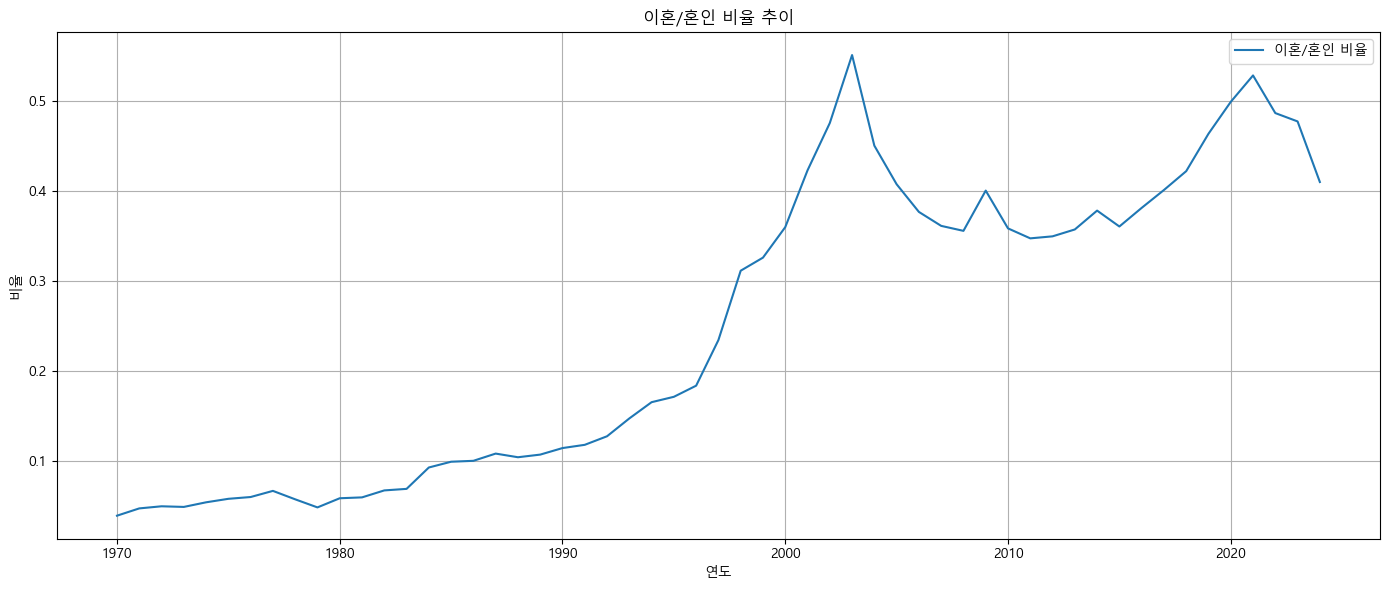

In [56]:
# 6. 시각화: 이혼/혼인 비율
plt.figure(figsize=(14, 6))
plt.plot(df_ratio.index, df_ratio['이혼/혼인 비율'], label='이혼/혼인 비율')
plt.title('이혼/혼인 비율 추이')
plt.xlabel('연도')
plt.ylabel('비율')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

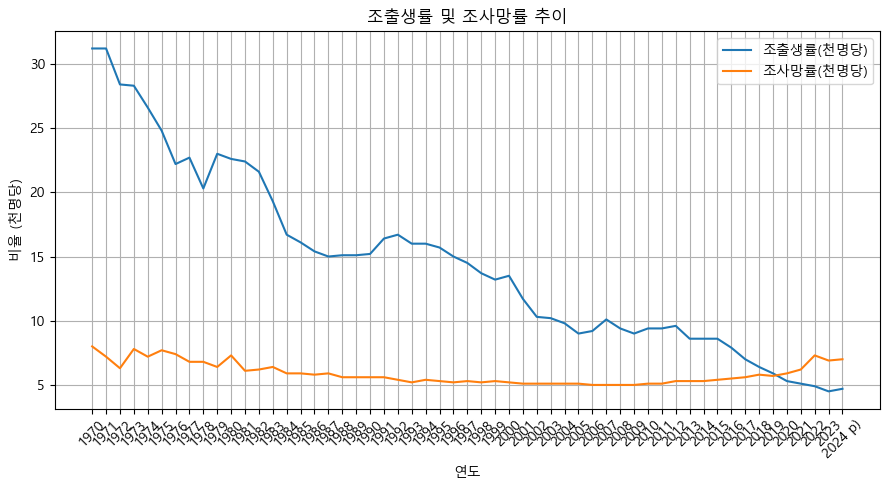

In [ ]:
# 7. 시각화: 출생아수 변화율
plt.figure(figsize=(14, 6))
plt.plot(df_ratio.index, df_ratio['출생아수 변화율(%)'], label='출생아수 변화율(%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('출생아수 연간 변화율(%) 추이')
plt.xlabel('연도')
plt.ylabel('변화율 (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 추가미션 분석 결과 정리
### 1. 자연증가율(%)
- 1970~1990년대: **30% 이상**으로 **높음**
- 2000년대 이후: **급격히 낮아지고 있음**
- 2020년 이후: **음수로 전환**

### 2. 이혼/혼인 비율
- 1980년대: **0.1~0.2 수준 (낮음)**
- 2000년대: **0.4~0.45로 급격히 상승**
- 최근(2020년대): **0.5 전후**
- 이혼/혼인 비율 **높아지고 있음**, 결혼 유지 비율이 **급격히 낮아지는 중**

### 3. 출생아수 변화율(%)
- 출산율 변동이 큰 시기: **1982, 1992, 2001, 2020**
- **2020년대 이후 급감**
- 출생아수 **해마다 감소**

